### Independent group analysis

#### Hypothesis (Quang Loc Lam): 

Our hypothesis is that patients who have diabetes will need more time to recover from COVID-19 than patients how only have COVID-19, because diabetes can significantly lengthen recovery time from illnesses due to its impact on blood circulation, immune function, and wound healing. It means that the procedure lengths of patients who have both diabetes and COVID-19 are longer than the procedure lengths of patients who have only COVID-19.

#### Value:

Our research can provide valuable insights for healthcare providers to better manage and anticipate the needs of diabetic patients with COVID-19. Moreover, it helps the hospitals and healthcare providers estimate the extended procedure time that patients with diabetes and COVID-19 need, so they can allocate the resources better.

#### Methodology

We draw a Box Plot which includes the procedure lengths of:
- Patients who have both diabetes and COVID-19. 
- Patients who have only COVID-19.

The Box Whisker plot will show us if the difference between the procedure length of patients who have both diabetes and COVID-19 and the procedure length of patients who have only COVID-19 is statistically significant.

In [0]:
from pyspark.sql.functions import size, col 

procedure_length = df.withColumn("procedure_length", size(col("procedures")))
procedure_length.select("procedures", "procedure_length").take(1)

Out[53]: [Row(procedures=[Row(code='261352009', date='2020-03-02', description='Face mask (physical object)', reasonCode='840544004', reasonDescription='Suspected COVID-19'), Row(code='399208008', date='2020-03-02', description='Plain chest X-ray (procedure)', reasonCode='', reasonDescription=''), Row(code='371908008', date='2020-03-02', description='Oxygen administration by mask (procedure)', reasonCode='389087006', reasonDescription='Hypoxemia (disorder)'), Row(code='431182000', date='2020-03-02', description='Placing subject in prone position (procedure)', reasonCode='389087006', reasonDescription='Hypoxemia (disorder)'), Row(code='371908008', date='2020-03-03', description='Oxygen administration by mask (procedure)', reasonCode='389087006', reasonDescription='Hypoxemia (disorder)'), Row(code='431182000', date='2020-03-03', description='Placing subject in prone position (procedure)', reasonCode='389087006', reasonDescription='Hypoxemia (disorder)'), Row(code='371908008', date='2020-

Calculate the number of patients having both COVID-19 and diabetes:

In [0]:
from pyspark.sql.functions import expr

# Filter patients with both COVID-19 and Diabetes
both = procedure_length.filter(
    expr("exists(conditions, x -> x.description = 'COVID-19')") & 
    expr("exists(conditions, x -> x.description LIKE '%diabetes%')")
)

# Count the number of matching rows
count_both = both.count()
print(f"Number of patients with both COVID-19 and diabetes: {count_both}")


Number of patients with both COVID-19 and diabetes: 5


Calculate the number of patients who have COVID-19 but do not have diabetes:

In [0]:
from pyspark.sql.functions import expr

# Filter patients with only COVID-19 (without Diabetes)
only_covid = procedure_length.filter(
    expr("exists(conditions, x -> x.description = 'COVID-19')") & 
    ~expr("exists(conditions, x -> x.description LIKE 'diabetes')")
)

# Count the number of matching rows
count_only_covid = only_covid.count()
print(f"Number of patients with only COVID-19 (no diabetes): {count_only_covid}")


Number of patients with only COVID-19 (no diabetes): 1435


Collect the procedure lengths of patients who have both COVID-19 and diabetes:

In [0]:

both_counts = both.select("procedure_length").collect()
both_counts_list = [row['procedure_length'] for row in both_counts]
both_counts_list[0:20]

Out[74]: [1, 26, 2, 34, 17]

Collect the procedure lengths of patients who have only COVID-19:

In [0]:
only_covid_counts = only_covid.select("procedure_length").collect()
only_covid_counts_list = [row['procedure_length'] for row in only_covid_counts]
only_covid_counts_list[0:20]

Out[73]: [16, 1, 12, 56, 1, 1, 1, 1, 1, 1, 1, 42, 1, 2, 19, 2, 3, 1, 32, 1]

Draw a Box Plot to compare the procedure lengths of patients who have both diabetes and COVID-19 and the procedure lengths of patients who have only COVID-19.

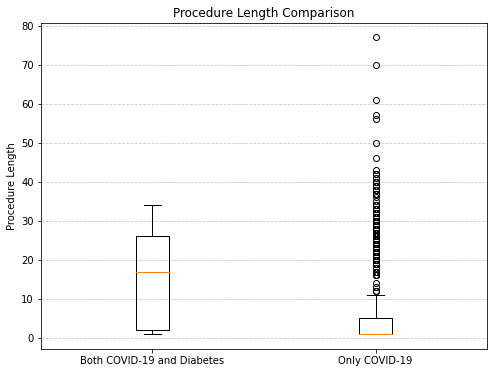

In [0]:
# Re-import necessary libraries
import matplotlib.pyplot as plt

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot([both_counts_list, only_covid_counts_list], labels=['Both COVID-19 and Diabetes', 'Only COVID-19'])

# Customize the plot
plt.title('Procedure Length Comparison')
plt.ylabel('Procedure Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Conclusion: 
- The Box Plot shows that the procedure lengths of patients who have both diabetes and COVID-19 are statistically longer than the procedure lengths of patients who have only COVID-19. 
- Our hypothesis is confirmed.